# INTRODUCTION

The majority of the countries finalize health insurance costs based on many factors such as age, number of people in families, etc. What should be the actual health insurance price for an individual or a family is an issue for many companies. Many factors have been shown association with higher insurance price such as age, smoking status, pre-existing disease etc,. Researchers are still exploring more features to help insurance company to predict insurance price with a much higher accuracy.

# AIM

Aim of the current project is in depth exploration to identify important features relevant to health insurance price as well as best ML model to help company increase the accuracy of health insurance prediction.

# Basic Analysis

In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mounting google drive and uploading the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Health_insurance_cost.xlsx')
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
# creating multiple copies of the dataset to not disturb the original, and to use them as and when required

df1 = df.copy()  # first copy of the dataset
df2 = df.copy()  # second copy of the dataset

In [ ]:
df.shape  # checking the rows and columns

(1338, 7)

In [ ]:
df.info()  # checking the column names and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe(include='all')  # checking the statistics of the dataset

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [ ]:
df.isnull().sum()  # checking the missing values

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [ ]:
df.isnull().mean()*100  # checking the percentage of missing values

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

In [ ]:
import missingno as msno  # importing library to examine missing values

<Axes: >

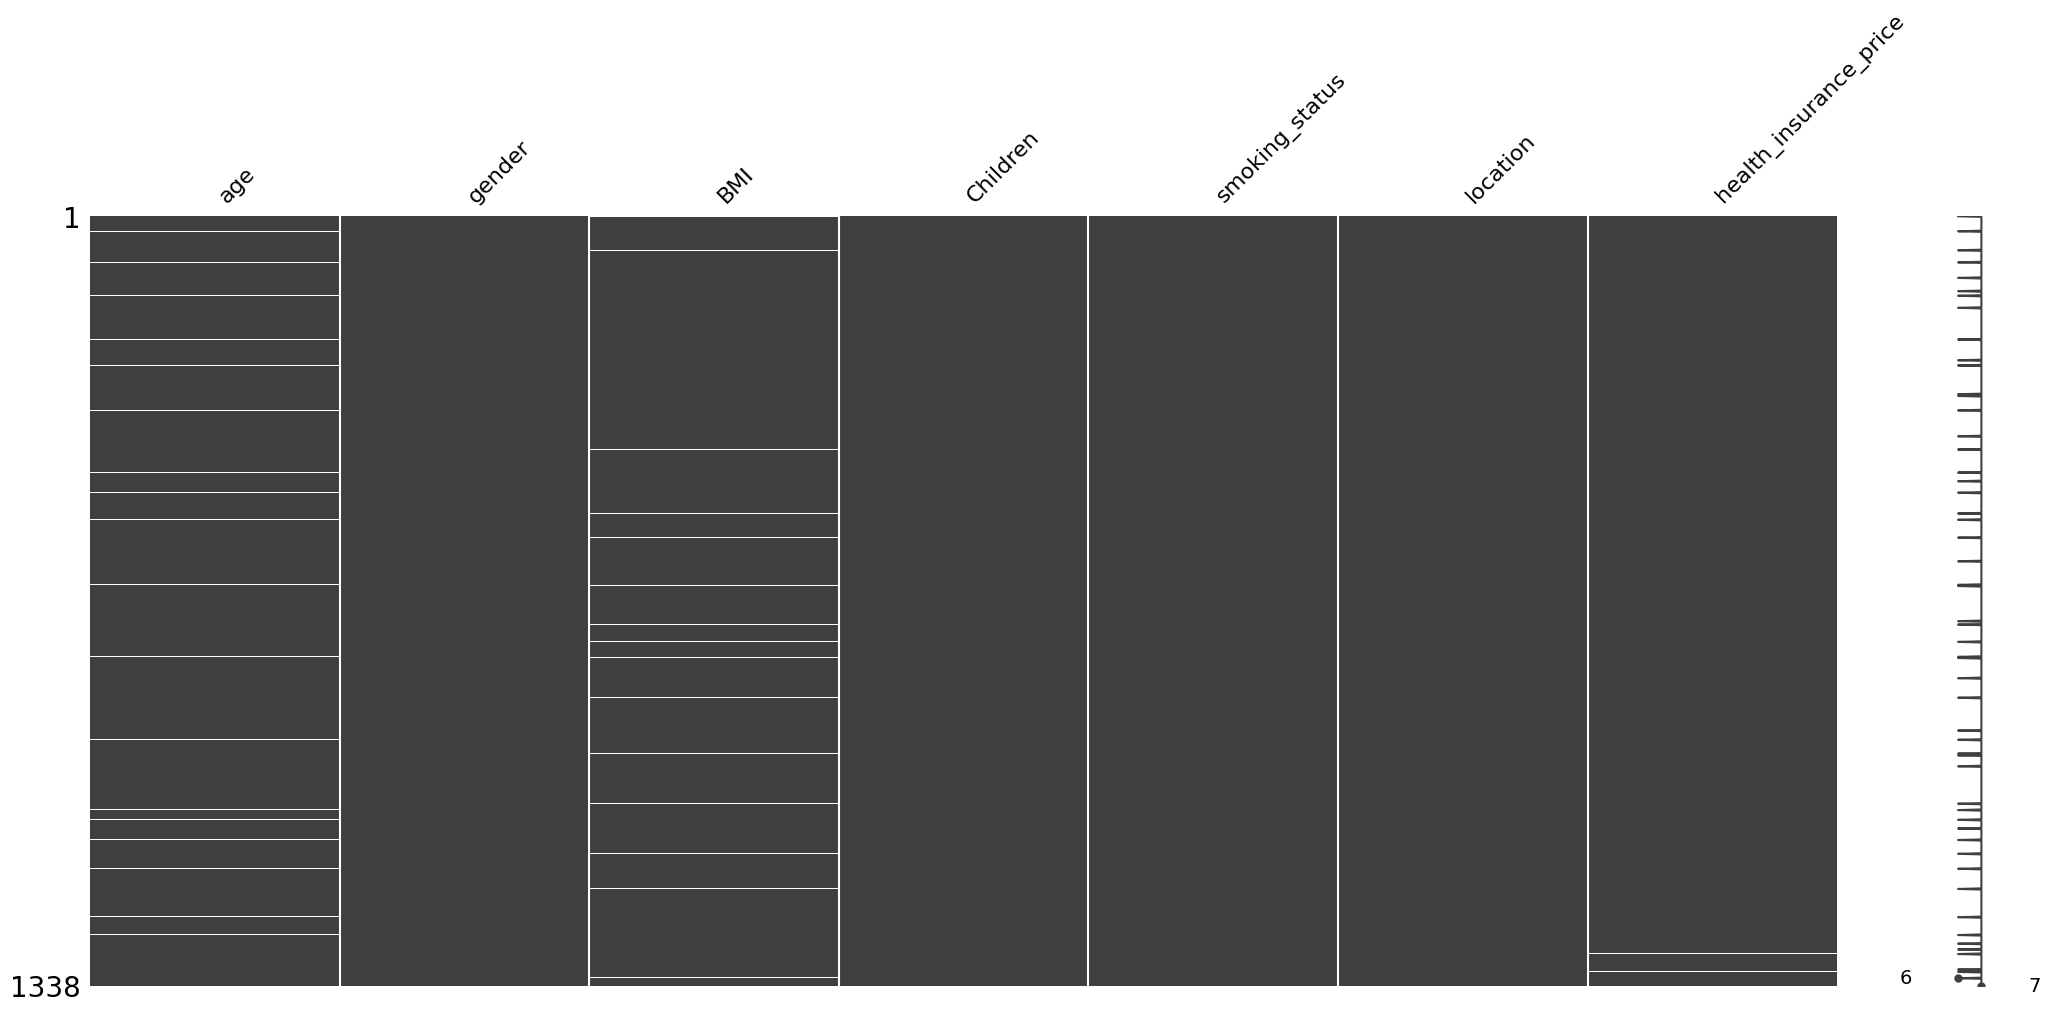

In [ ]:
msno.matrix(df)  # creating a matrix plot to see patterns in missing values

<Axes: >

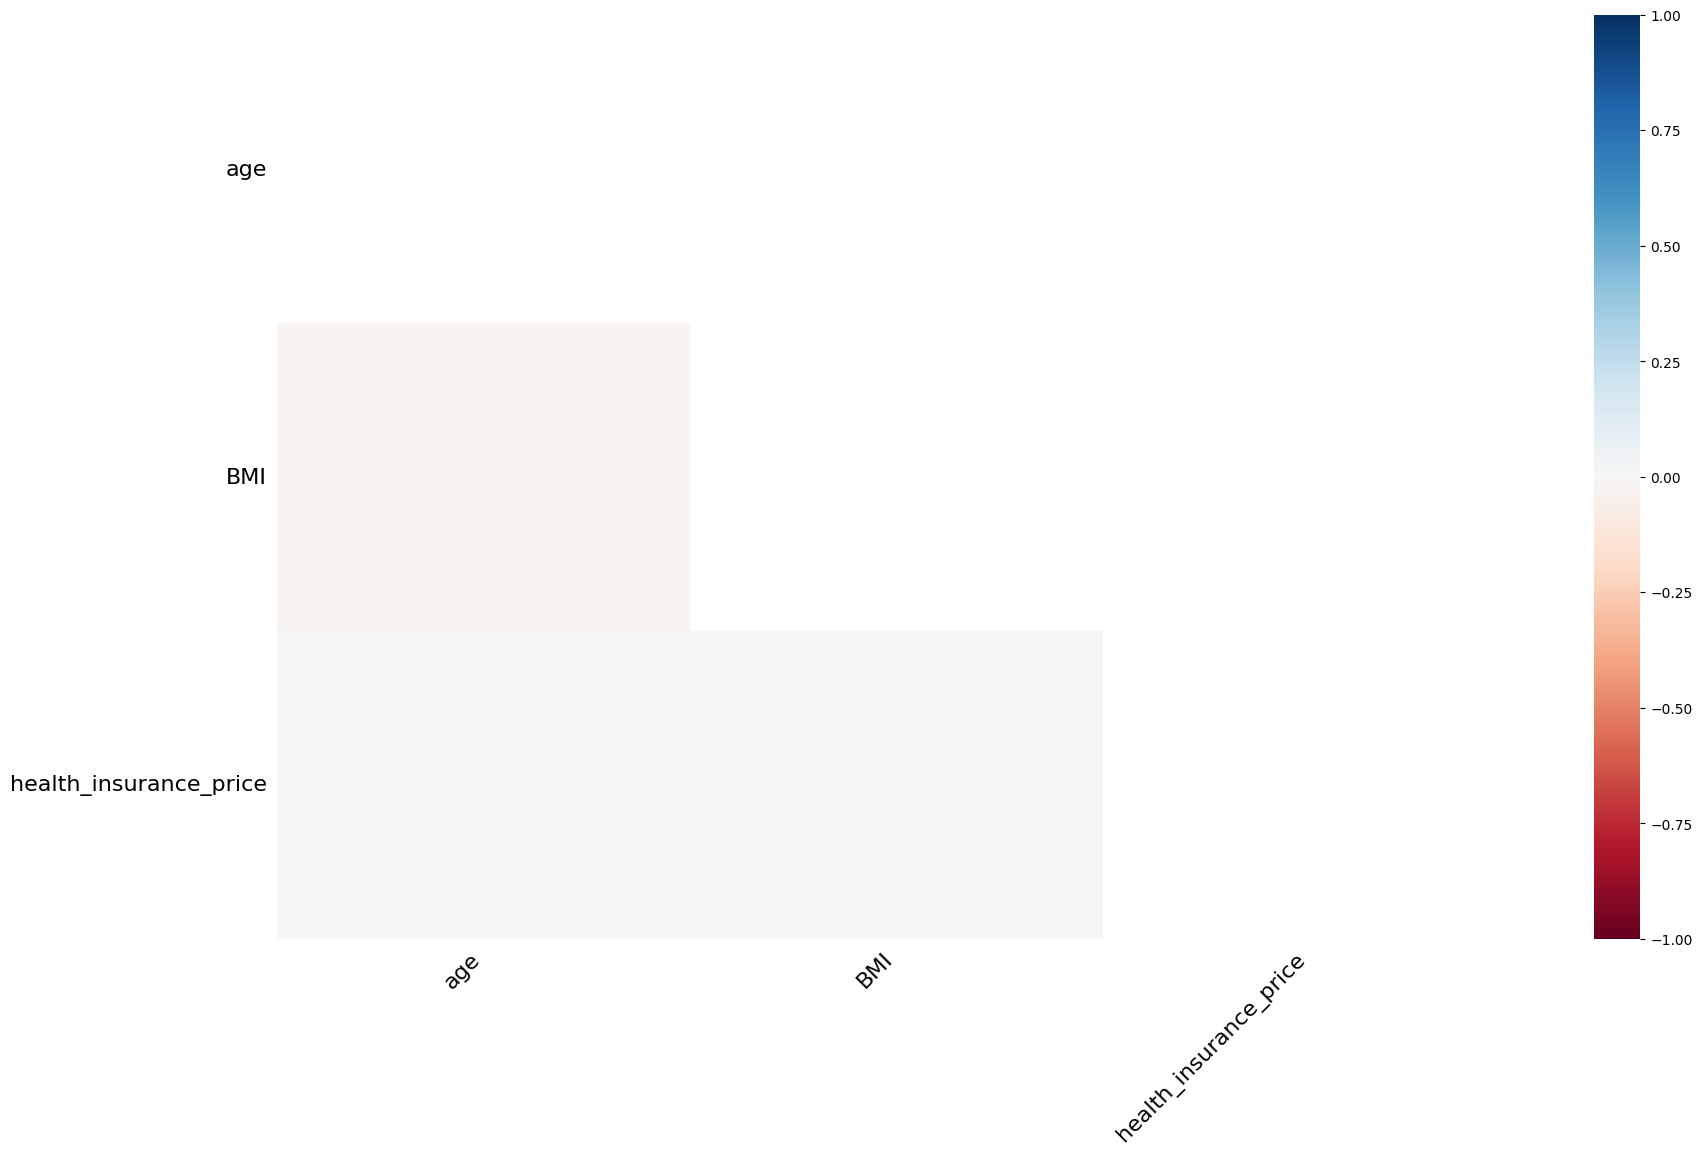

In [ ]:
msno.heatmap(df)  # to check for correlations between missing values

From the above plot we can understand there is no correlation between the missing values

In [ ]:
df.smoking_status.unique()  # to find unique values within the column

array(['yes', 'no'], dtype=object)

In [ ]:
df.location.unique()  # to find unique values in location column

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.gender.unique()  # to find unique values in gender column

array(['female', 'male'], dtype=object)

In [ ]:
df.head() # checking the head of the dataset again

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


First we will do feature encoding before imputing the missing values

In [ ]:
# Applying encoding through pd.get_dummies

df_en = pd.get_dummies(df, columns=['gender', 'smoking_status', 'location'], drop_first = True)
df_en.head()

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,NaN,0,16884.92400,False,True,False,False,True
1,18.0,33.770,1,1725.55230,True,False,False,True,False
2,28.0,33.000,3,4449.46200,True,False,False,True,False
3,33.0,22.705,0,21984.47061,True,False,True,False,False
4,32.0,28.880,0,3866.85520,True,False,True,False,False


# Dealing with Missing Values

In [ ]:
# Mean Imputation

from sklearn.impute import SimpleImputer
df_mean = df_en.copy(deep=True)  # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy="mean")
df_mean.iloc[:,:] = mean_imputer.fit_transform(df_mean)

In [ ]:
# Median Imputation

from sklearn.impute import SimpleImputer
df_median = df_en.copy(deep=True)  # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy="median")
df_median.iloc[:,:] = mean_imputer.fit_transform(df_median)

In [ ]:
# Mode Imputation

from sklearn.impute import SimpleImputer
df_mode = df_en.copy(deep=True)  # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy="most_frequent")
df_mode.iloc[:,:] = mean_imputer.fit_transform(df_mode)

In [ ]:
# Mode Imputation

from sklearn.impute import SimpleImputer
df_constant = df_en.copy(deep=True)  # creating a copy for further evaluation
constant_imputer = SimpleImputer(strategy="constant", fill_value = 0)
df_constant.iloc[:,:] = mean_imputer.fit_transform(df_constant)

In [ ]:
%%capture
pip install fancyimpute

In [ ]:
# KNN Imputation

from fancyimpute import KNN

knn_imputer = KNN()
df_knn = df_en.copy(deep=True)
df_knn.iloc[:,:] = knn_imputer.fit_transform(df_knn)

Imputing row 1/1338 with 1 missing, elapsed time: 0.267
Imputing row 101/1338 with 0 missing, elapsed time: 0.268
Imputing row 201/1338 with 0 missing, elapsed time: 0.269
Imputing row 301/1338 with 0 missing, elapsed time: 0.271
Imputing row 401/1338 with 0 missing, elapsed time: 0.272
Imputing row 501/1338 with 0 missing, elapsed time: 0.273
Imputing row 601/1338 with 0 missing, elapsed time: 0.274
Imputing row 701/1338 with 0 missing, elapsed time: 0.275
Imputing row 801/1338 with 0 missing, elapsed time: 0.276
Imputing row 901/1338 with 0 missing, elapsed time: 0.277
Imputing row 1001/1338 with 0 missing, elapsed time: 0.278
Imputing row 1101/1338 with 0 missing, elapsed time: 0.279
Imputing row 1201/1338 with 0 missing, elapsed time: 0.280
Imputing row 1301/1338 with 0 missing, elapsed time: 0.281


In [ ]:
# MICE Imputation

from fancyimpute import IterativeImputer

mice_imputer = IterativeImputer()
df_mice = df_en.copy(deep=True)
df_mice.iloc[:,:] = mice_imputer.fit_transform(df_mice)

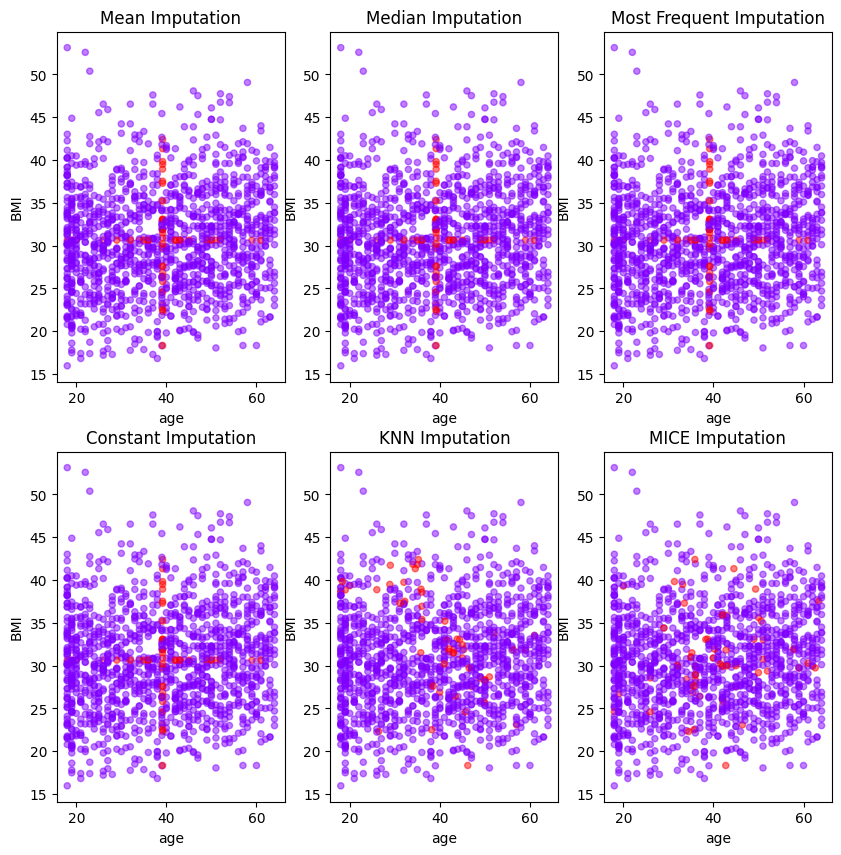

In [ ]:
# Plotting charts of imputations to check the best one

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
nullity = df_en['age'].isnull() + df_en['BMI'].isnull() # we want to specify the color values for the data points based on the nullity values
imputations = {'Mean Imputation': df_mean,
               'Median Imputation': df_median,
               'Most Frequent Imputation': df_mode,
               'Constant Imputation': df_constant,
               'KNN Imputation': df_knn,
              'MICE Imputation': df_mice}
#This loop iterates through the subplot axes and the keys of the imputations dictionary simultaneously using the zip() function.
#axes.flatten() is used to flatten the 2D array of subplot axes into a 1D array.
for ax, df_key in zip(axes.flatten(), imputations):

  #For each iteration of the loop, it accesses the DataFrame associated with the current df_key from the imputations dictionary.
    imputations[df_key].plot(x='age', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)
    #alpha=0.5 controls the transparency of the data points in the scatter plot.
    #c=nullity specifies the color values for the data points based on the nullity values. This could be a measure of missingness in the dataset.
    #cmap='rainbow' specifies the colormap to be used for coloring the data points.
    #ax=ax assigns the current subplot axis to which the scatter plot will be added.
    #colorbar=False suppresses the display of the colorbar.

In [ ]:
# Checking the stats of the project after KNN imputation
df_knn.describe(include="all")

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.193029,30.712283,1.094918,13264.396223,0.505232,0.204783,0.242900,0.272048,0.242900
std,13.960505,6.112579,1.205493,12104.971541,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,4746.521225,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.495000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16584.318157,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Checking the stats of the project after MICE imputation
df_mice.describe(include="all")

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.221540,30.642095,1.094918,13282.168553,0.505232,0.204783,0.242900,0.272048,0.242900
std,13.971986,6.073012,1.205493,12117.190890,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,4746.521225,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.300000,1.000000,9388.753650,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.496250,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


Both KNN and MICE have performed equally well. Therefore we can go ahead with any of them. For this project, we will be choosing KNN


In [ ]:
# Checking the head of df_knn once again

df_knn.head()

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,38.844533,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770000,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705000,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880000,0,3866.85520,1.0,0.0,1.0,0.0,0.0


# Data Visualization

Univariate Analysis

The aim is to check the distribution of the data. If it is normally distributed or skewed for numerical value. If it is a categorical value then we have to check if categories are balanced on unblanced.

In [ ]:
# We will use the raw data and not the KNN imputed data for analysis

df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age', ylabel='Count'>

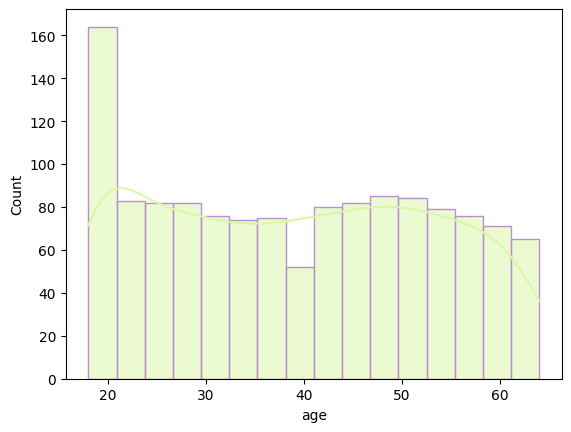

In [ ]:
# Age group analysis

sns.histplot(data = df,x="age",bins=16,color="#DAF7A6",edgecolor='#BB8FCE', kde = True)

Age of most of the customers fall in the range of 18-21 and there are a lesser number of customers in the range of 39-41 comparatively.

Note: width of each bin is 3. starting from 18 which is a minimum value to 64 which is the max value. The difference (64-18) is then divided by 16.


<ipython-input-61-67e1daed57ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df.Children, palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])
<ipython-input-61-67e1daed57ad>:1: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(x=df.Children, palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])


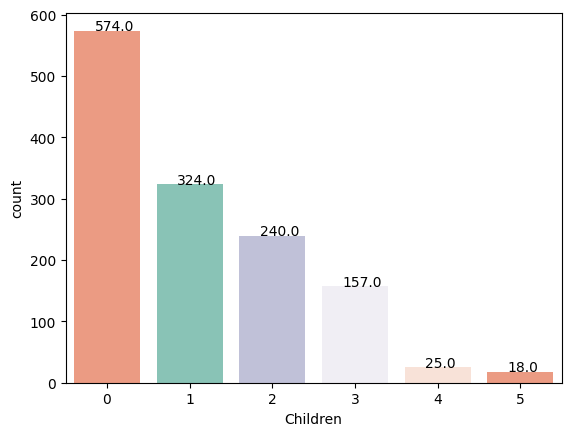

In [ ]:
# No of Children analysis

ax=sns.countplot(x=df.Children, palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

It seems majority of the customers in the project have no children. That said, customers with 1 children are more followed by 2 and so on. Moreover, There are very few customers with children 4 and 5.

<ipython-input-63-cb0b7f774a67>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x=df.smoking_status, palette=["#edf8b1", "#7fcdbb"])


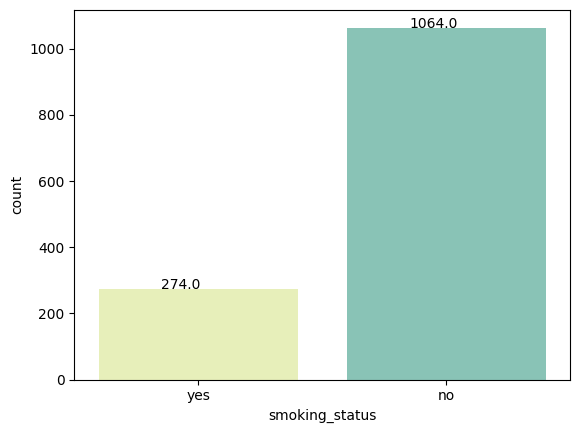

In [ ]:
# Smokers vs Non-Smokers analysis

ax =sns.countplot(x=df.smoking_status, palette=["#edf8b1", "#7fcdbb"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Most of the clients are non-smokers in this dataset

<ipython-input-66-3e39e4b67afd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x=df.gender, palette=["#fc9272","#fee0d2"])


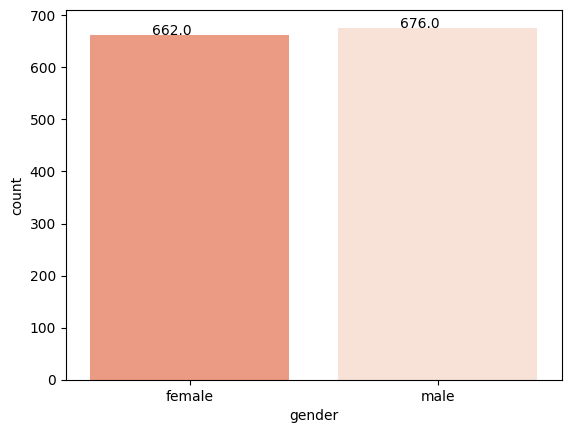

In [ ]:
# Gender Analysis

ax =sns.countplot(x=df.gender, palette=["#fc9272","#fee0d2"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Looks like the share of males and females are almost equal - no significant difference observed


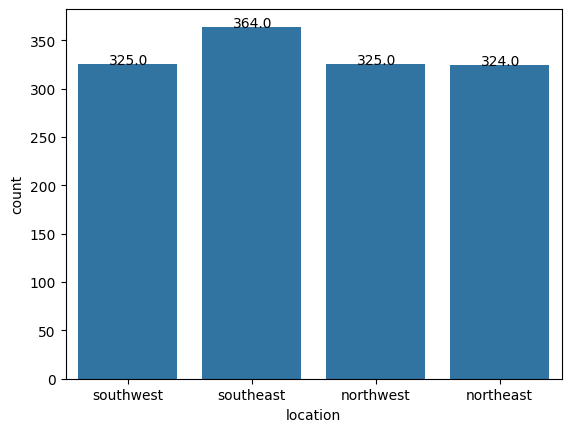

In [ ]:
# Location Analysis

ax =sns.countplot(x=df.location)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

 Southeast customers are the highest whereas customers from other locations are almost equal in number.

<Axes: xlabel='BMI', ylabel='Count'>

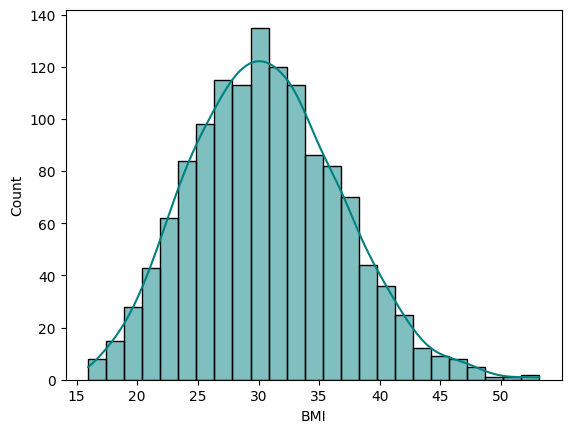

In [ ]:
# Checking the distribution of BMI - numerical variable

sns.histplot(data = df['BMI'],color='teal', kde = True)

From the historgram it looks like BMI of customers follows a normal distribution. However, let's verify

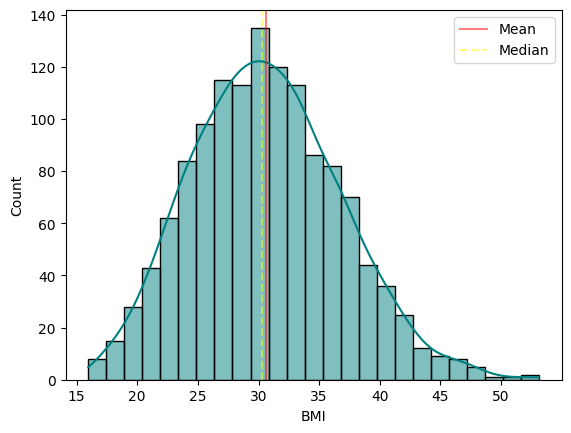

In [ ]:
# Verifying if Mean, Median and Mode are equal for BMI, in case of normal distribution

sns.histplot(data = df['BMI'],color='teal', kde = True)
plt.axvline(x=df.BMI.mean(),color='red',alpha=0.5,label='Mean') # function used to add a vertical line
plt.axvline(x=df.BMI.median(),c='yellow',ls='--',alpha=0.5,label='Median')
plt.legend()

Mean,Median and mode should be equal for Normal Distribution(ND) but it is not same here. Having said that most of the BMI values fall between 20 to 40

<Axes: ylabel='age'>

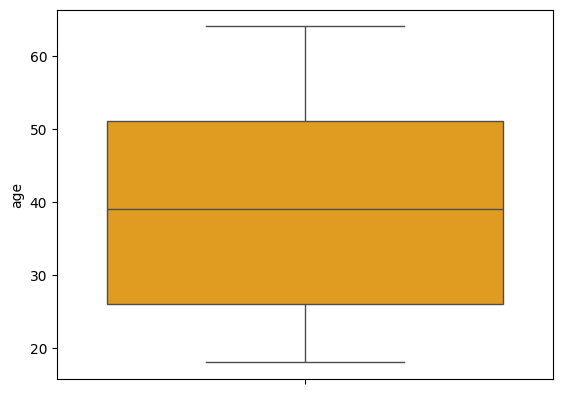

In [ ]:
# Dealing with outliers for Age

sns.boxplot(df["age"],color="orange")

Age does not seem to have any outliers

<Axes: ylabel='BMI'>

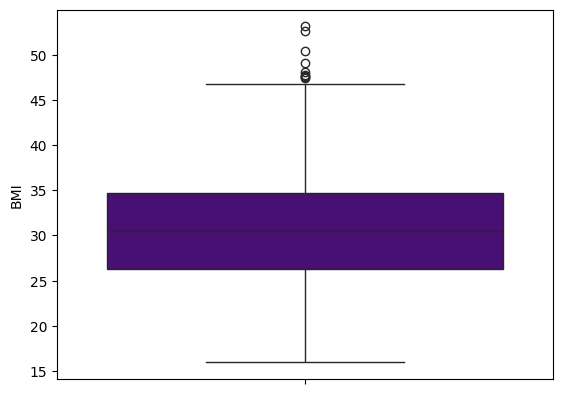

In [ ]:
# Outliers for BMI - we will use dataset df_knn for this

sns.boxplot(df_knn["BMI"], color="indigo")

It appears that we have outliers in BMI feature. The presence of outliers can dramatically change the magnitude of regression coefficients and even the direction of coefficient signs (i.e., from positive to negative or vice versa).

In [ ]:
# Creating a copy of df_knn to perform zscore outliers handling before performing IQR capping/trimming
# Creating a copy of df_knn after performing IQR does not make sense as we would have already dealt with outliers

df_knn_c=df_knn.copy()

In [ ]:
#Dealing with outliers

# Here I am using IQR to remove outliers.
Q1 = df_knn['BMI'].quantile(0.25)
Q3 = df_knn['BMI'].quantile(0.75)
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

34.7 26.315
8.385000000000002
47.2775
13.737499999999999


In [ ]:
df_knn.shape

(1338, 9)

In [ ]:
# Trimming the outliers as we have less number of outliers

df_knn = df_knn[df_knn.BMI < upper_bound]
df_knn = df_knn[df_knn.BMI > lower_bound]
df_knn.shape

(1329, 9)

<Axes: ylabel='BMI'>

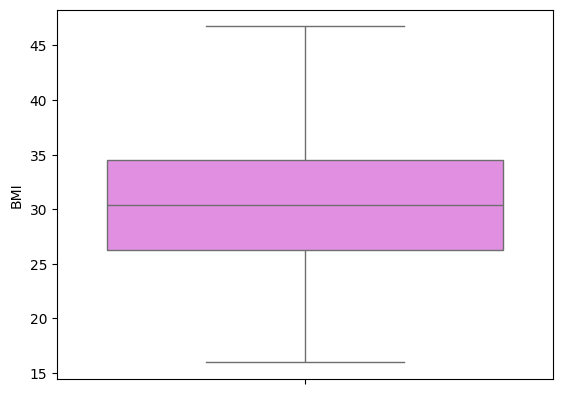

In [ ]:
# Checking if outliers are gone

sns.boxplot(df_knn["BMI"], color="violet")

Outliers have been successfully removed in the above exercise. Now we will check if outliers can be handled better using zscore technique

In [ ]:
df_knn_c.shape

(1338, 9)

<Axes: ylabel='BMI'>

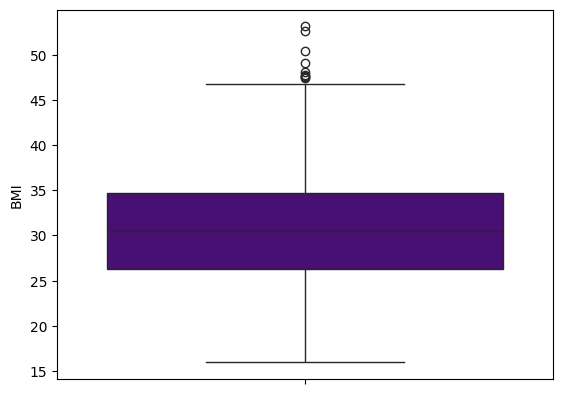

In [ ]:
sns.boxplot(df_knn_c["BMI"], color="indigo") # checking the outliers

In [ ]:
# Using zscore formula - x-mean/stddev
df_knn_c['zscore'] = (df_knn_c.BMI - df_knn_c.BMI.mean())/df_knn_c.BMI.std(ddof=0)
df_knn_c['zscore'].unique()

array([ 1.33090969e+00,  5.00420500e-01,  3.74403657e-01, -1.31045791e+00,
       -2.99868286e-01, -8.13755154e-01,  4.46413281e-01, -4.86438678e-01,
       -1.44392959e-01, -7.97389331e-01, -7.35199200e-01, -7.23743123e-01,
        6.03525190e-01,  1.49055284e+00,  1.86860337e+00, -1.00032555e+00,
        1.10823672e-02, -1.12388752e+00,  1.56910880e+00,  7.50817605e-01,
        8.66196663e-01,  2.76208713e-01,  5.54427719e-01,  1.97652759e-01,
       -4.39796080e-01, -4.89711842e-01, -1.24826778e+00,  3.37580553e-01,
       -2.18111974e+00,  9.14475843e-01,  7.99915076e-01, -7.19651667e-01,
       -3.45692592e-01, -3.93153482e-01,  9.30841667e-01, -1.68359869e+00,
        3.68675618e-01, -1.62222685e+00,  9.75029392e-01,  1.50364550e+00,
       -6.73009069e-01,  9.68483062e-01, -1.46184178e+00,  1.43555320e-02,
        1.03721952e+00,  1.07813408e+00,  1.30152758e+00,  6.64078739e-01,
       -1.01178162e+00,  7.34451781e-01,  8.04006532e-01,  4.77508347e-01,
       -4.43887536e-01,  

In [ ]:
#Usually we will consider anything more than 3SD as an outlier.
df_knn_c[(df_knn_c['zscore']>3)]

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest,zscore
116,58.0,49.06,0,11381.3254,1.0,0.0,0.0,1.0,0.0,3.002755
847,23.0,50.38,1,2438.0552,1.0,0.0,0.0,1.0,0.0,3.218784
1047,22.0,52.58,1,44501.3982,1.0,1.0,0.0,1.0,0.0,3.578832
1317,18.0,53.13,0,1163.4627,1.0,0.0,0.0,1.0,0.0,3.668844


We can see we have only 4 rows with zscore more than 3.therefore, let's try removing them and observe the boxplot.

In [ ]:
#removing those rows
# delete a few specified rows at index values 116, 847, 1047, 1317.
# Note that the index values do not always align to row numbers.
df_knn_c = df_knn_c.drop(labels=[116,847,1047,1317], axis=0)

In [ ]:
df_knn_c.shape

(1334, 10)

<Axes: ylabel='BMI'>

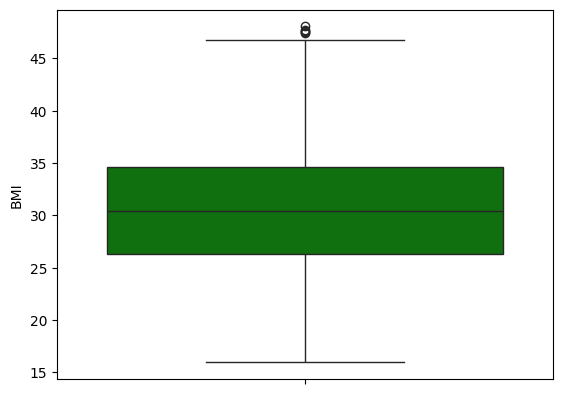

In [ ]:
sns.boxplot(df_knn_c["BMI"], color="green") # after dealing with outliers using z-score

Since we still see outliers, zscore clearly hasn't performed as well as IQR. Therefore we will proceed with the IQR data.

Note: For outliers, statistically it is good to treat extreme outliers (+3 * IQR and -3 * IQR). Minor outliers are OK. As at the end we are using DT, RF ML models etc.

Bivariate Analysis

In [ ]:
df.head()   # checking the head of the original dataframe (raw data)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


Numerical vs. Numerical values

<Axes: xlabel='age', ylabel='health_insurance_price'>

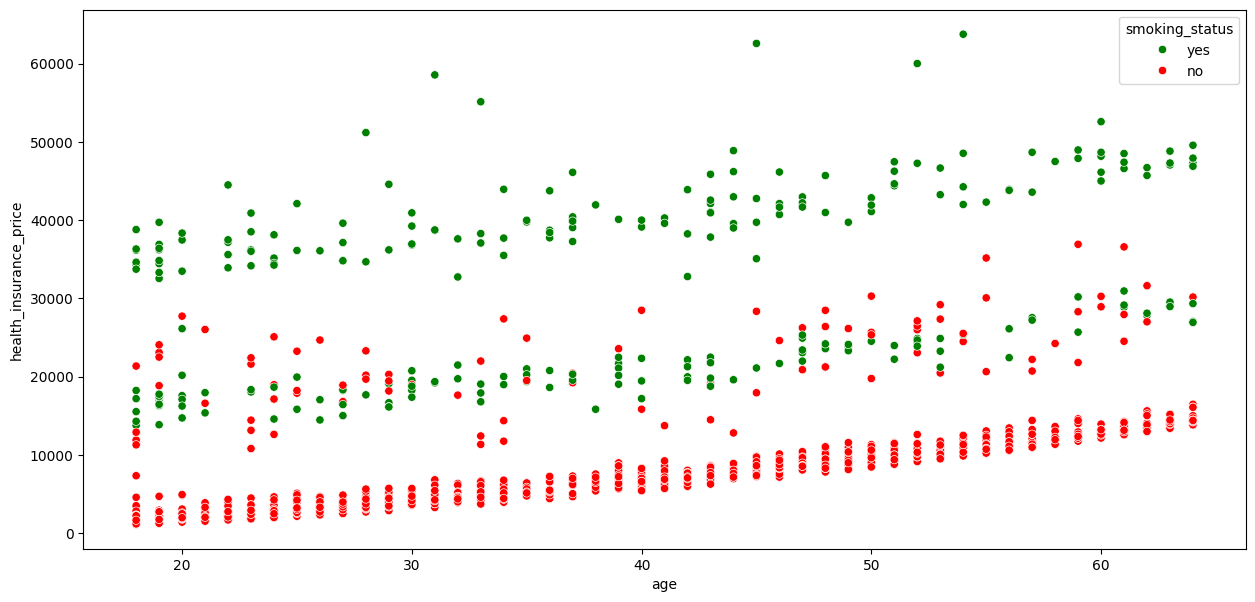

In [ ]:
# Age vs. Health Insurance Price

plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['age'], y = df['health_insurance_price'], hue = df['smoking_status'], palette=['green','red'])

Observation:

It appears to us that is a relation between age and insurance_price as we see that increase in age is causing increase in health insurance price, for non-smokers. Having said that, smokers insurance prices are higher in comparison to non-smokers.


<Axes: xlabel='BMI', ylabel='health_insurance_price'>

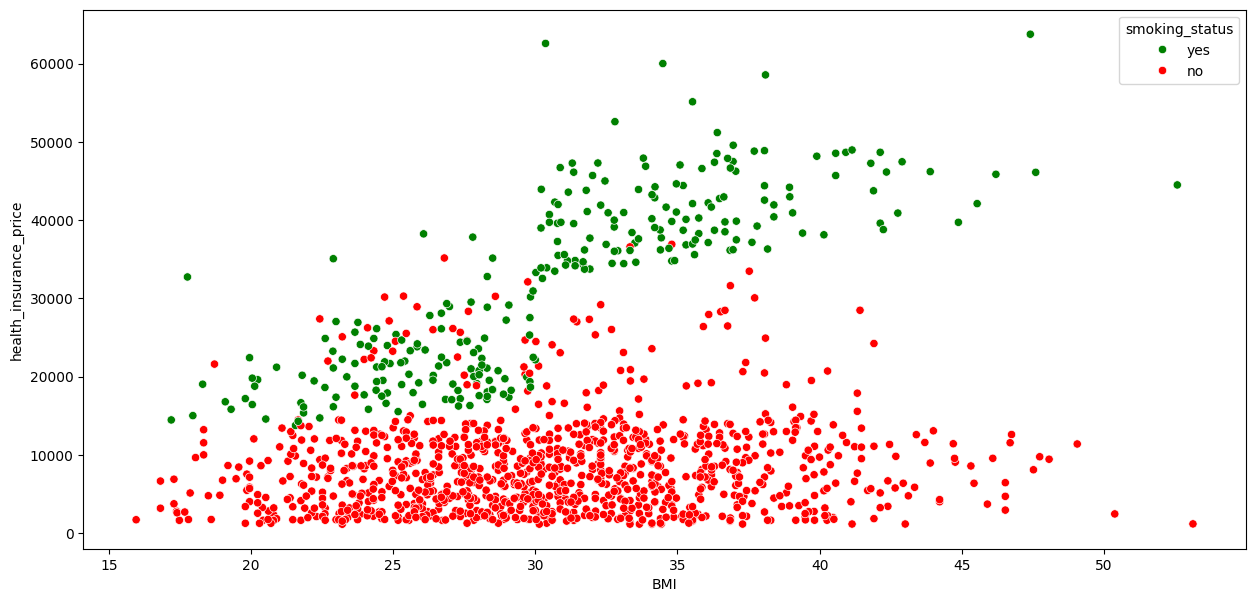

In [ ]:
# BMI vs. Health Insurance Price

plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['BMI'], y = df['health_insurance_price'], hue = df['smoking_status'], palette=['green','red'])

It appears that as BMI of smokers increases, their insurance price escalates.

<Axes: xlabel='age', ylabel='health_insurance_price'>

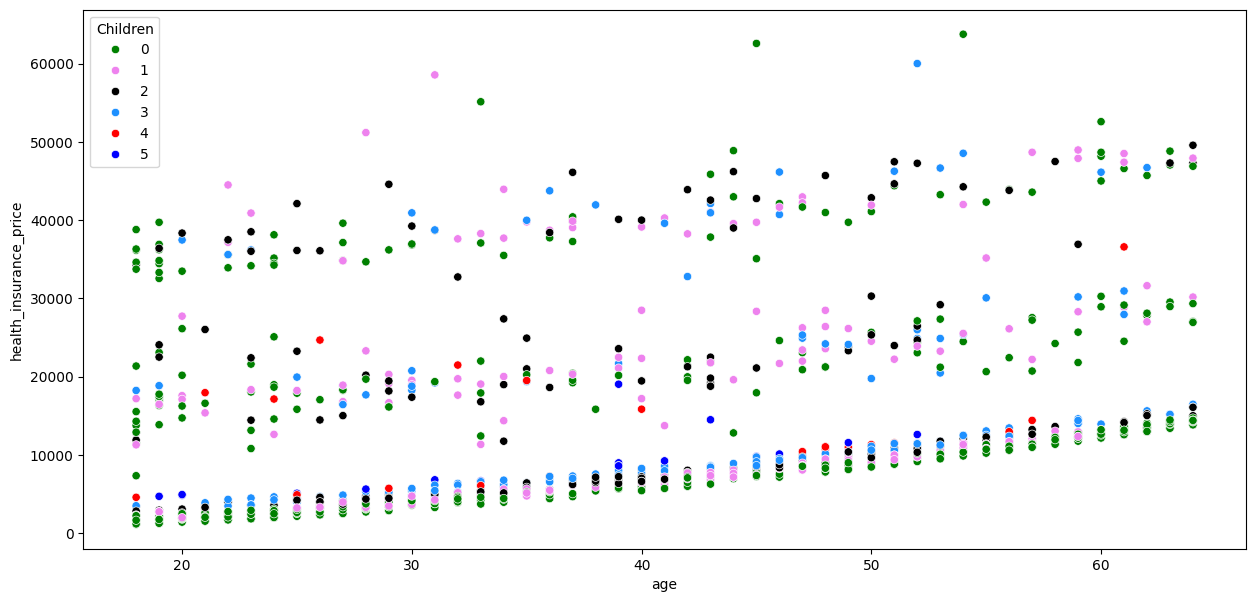

In [ ]:
# Age vs. Health Insurance Price vs. Children

plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['age'], y = df['health_insurance_price'], hue = df['Children'], palette=['green','violet','black','dodgerblue','red',"blue"])

It is tough to say there is an impact of number of children of people with any age on insurance price.

For instance, we can't say elder people with more children paid more insurance price nor we can say younger peopl with more children paid more insurance price.

Similarly, we can't say younger people with less children paid more insurance price nor we can say elder peopl with less children paid more insurance price.


<Axes: xlabel='BMI', ylabel='health_insurance_price'>

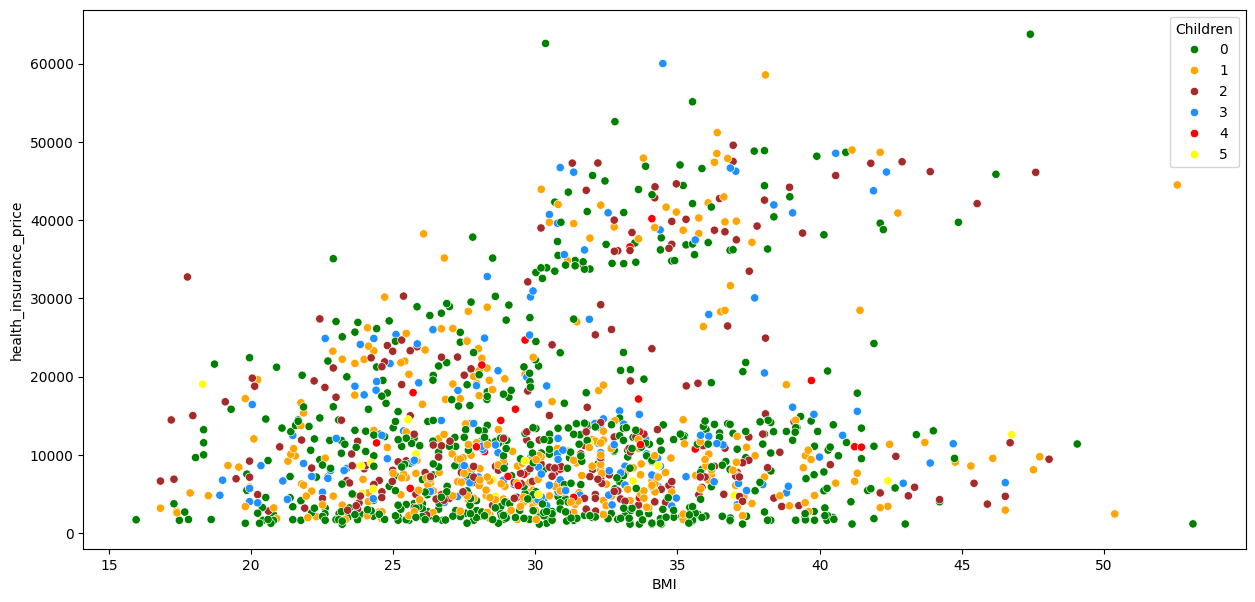

In [ ]:
# BMI vs. Health Insurance Price vs. Children

plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['BMI'], y = df['health_insurance_price'], hue = df['Children'], palette=['green','orange','brown','dodgerblue','red',"yellow"])

It seems BMI is not having much impact on health insurance. Smoking status is having much higher impact on health insurance price as per above figures.

Categorical vs. Numerical Variables

In [ ]:
df.head()  # checking the head of the raw dataset

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


<ipython-input-108-4a292bd4fb82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="health_insurance_price",palette=['blue','teal'])


<Axes: xlabel='gender', ylabel='health_insurance_price'>

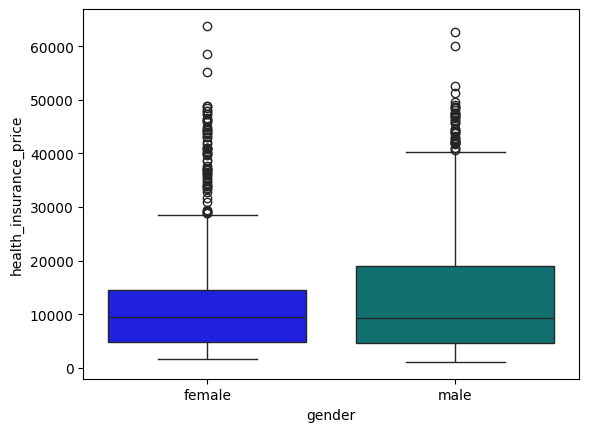

In [ ]:
# Gender vs. Health Insurance Price

sns.boxplot(data=df, x="gender", y="health_insurance_price",palette=['blue','teal'])

<ipython-input-110-62fc4f13e8d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="smoking_status", y="health_insurance_price",palette=['violet','red'])


<Axes: xlabel='smoking_status', ylabel='health_insurance_price'>

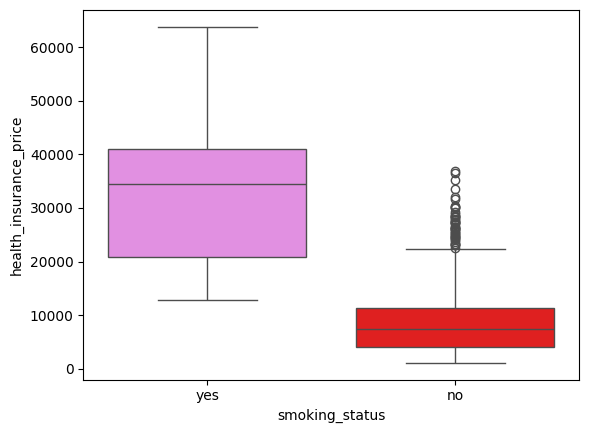

In [ ]:
#Smoking status vs Health Insurance Price

sns.boxplot(data=df, x="smoking_status", y="health_insurance_price",palette=['violet','red'])

There is an impact of smoking status on health insurance price. if the status is yes then health insurance price range is high for them.

<ipython-input-112-8d61d872f260>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="location", y="health_insurance_price",palette=['green','violet','red','dodgerblue'])


<Axes: xlabel='location', ylabel='health_insurance_price'>

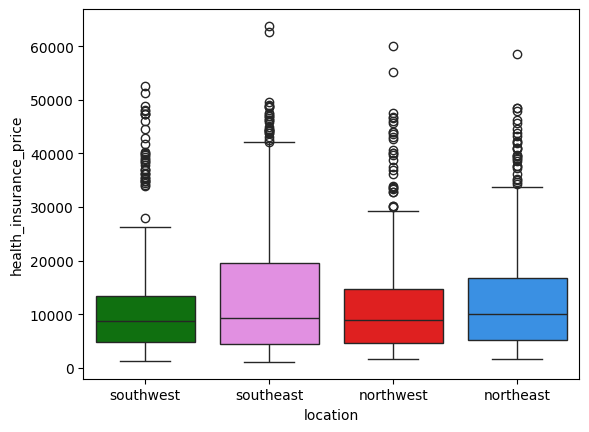

In [ ]:
# Location vs Health Insurance Price

# Boxplots allow us a simple way to compare groups and view dispersion and spread in data.

sns.boxplot(data=df, x="location", y="health_insurance_price",palette=['green','violet','red','dodgerblue'])

The median value of all the groups looks almost equal.so, we can't see much of an impact of location on health insurance price


<ipython-input-113-ea51906242e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Children", y="health_insurance_price",palette=['yellow','pink','violet','dodgerblue',"red","green"])


<Axes: xlabel='Children', ylabel='health_insurance_price'>

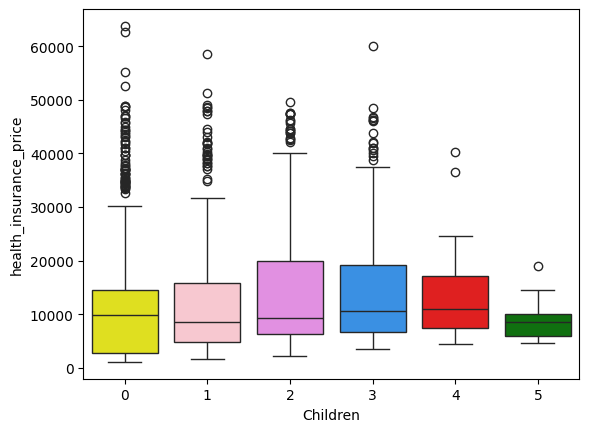

In [ ]:
# Children vs insurance price

sns.boxplot(data=df, x="Children", y="health_insurance_price",palette=['yellow','pink','violet','dodgerblue',"red","green"])

Looking at each of the groups median value, we can say that there is not much of an impact of number of children on health insurance price

<ipython-input-114-5ab874642c5b>:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=df, x="Children", y="health_insurance_price",hue="smoking_status", palette=['yellow','pink','violet','dodgerblue',"red","green"])


<Axes: xlabel='Children', ylabel='health_insurance_price'>

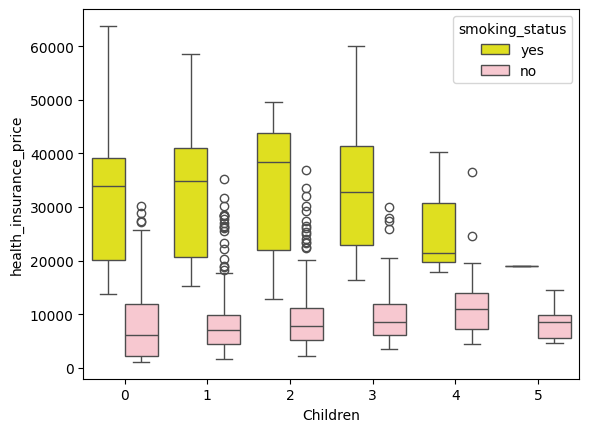

In [ ]:
# Children vs. Health Insurance Price against hue of Smoking Status

sns.boxplot(data=df, x="Children", y="health_insurance_price",hue="smoking_status", palette=['yellow','pink','violet','dodgerblue',"red","green"])

<ipython-input-115-672789b0e978>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Children", y="age",palette=['green','dodgerblue',"blue","red","pink"])
<ipython-input-115-672789b0e978>:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="Children", y="age",palette=['green','dodgerblue',"blue","red","pink"])


<Axes: xlabel='Children', ylabel='age'>

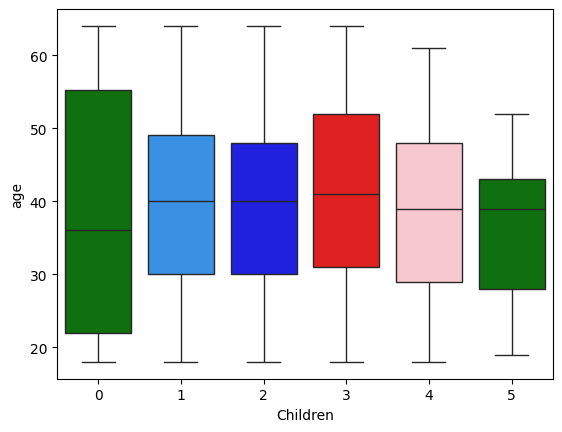

In [ ]:
# Children vs Age

sns.boxplot(data=df, x="Children", y="age",palette=['green','dodgerblue',"blue","red","pink"])

From this figure we can't say elder people have more children or have less children. Similarly, we can't say that younger people have more children or have less children. Basically, number of children is not determined by age.

<ipython-input-116-2c784458a2a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Children", y="BMI",palette=['Green','yellow',"violet","brown","red"])
<ipython-input-116-2c784458a2a8>:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="Children", y="BMI",palette=['Green','yellow',"violet","brown","red"])


<Axes: xlabel='Children', ylabel='BMI'>

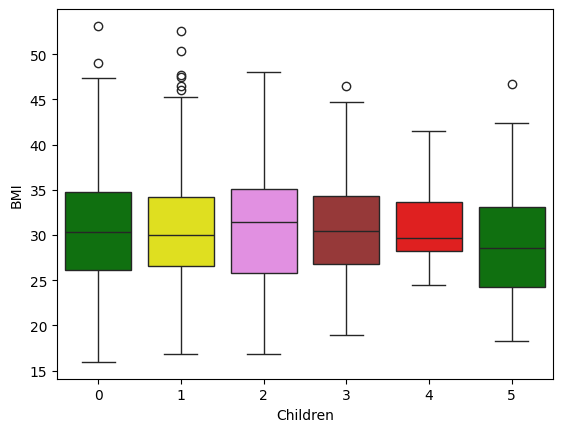

In [ ]:
# Children vs BMI

sns.boxplot(data=df, x="Children", y="BMI",palette=['Green','yellow',"violet","brown","red"])

Seemingly, there is no effect of number of children on people's BMI

In [ ]:
# Checking the correlation

df_corr = pd.DataFrame(df_knn)
print(df_corr.corr(method = 'spearman'))

                             age       BMI  Children  health_insurance_price  \
age                     1.000000  0.092420  0.053710                0.532861   
BMI                     0.092420  1.000000  0.017568                0.117650   
Children                0.053710  0.017568  1.000000                0.133261   
health_insurance_price  0.532861  0.117650  0.133261                1.000000   
gender_male            -0.020073  0.043687  0.017342                0.013902   
smoking_status_yes     -0.020799  0.003042  0.016300                0.661426   
location_northwest      0.001221 -0.117999  0.034324               -0.021702   
location_southeast     -0.019962  0.230281 -0.015881                0.017766   
location_southwest      0.018935  0.006263  0.009662               -0.043892   

                        gender_male  smoking_status_yes  location_northwest  \
age                       -0.020073           -0.020799            0.001221   
BMI                        0.043687      

Barring Age which has moderate co-relation, we don't see much of the corelation between the target variable and independent variables.

In [ ]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X_vif = df_knn.drop(['health_insurance_price'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

              feature        VIF
0                 age   7.715136
1                 BMI  11.353929
2            Children   1.810932
3         gender_male   2.000555
4  smoking_status_yes   1.261580
5  location_northwest   1.900281
6  location_southeast   2.222424
7  location_southwest   1.965630


VIF doesn't exist for most columns except VIF>5 for age and BMI, so these columns would need to be dropped

In [ ]:
X_vif.head(5)

,age,BMI,Children,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,38.844533,0,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770000,1,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000000,3,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705000,0,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880000,0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X=X_vif.drop(["age","BMI"], axis=1)

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

              feature       VIF
0            Children  1.613378
1         gender_male  1.723242
2  smoking_status_yes  1.232197
3  location_northwest  1.331080
4  location_southeast  1.380246
5  location_southwest  1.331897


After dropping the columns with VIF>5 we are left with minimum no. of features.

However -

In the interest of avoiding multicolinearity we lost many of the features.

Therefore,I am not using Linear regression as it did not perform well when I checked it because of which I have chosen non-parametric algorithms, like RF, DT and SVM (Support Vector Machines with Gaussian Kernels)

In [ ]:
# Separating independent variables and the dependent variable
X=df_knn.drop(("health_insurance_price"), axis=1)
y=df_knn["health_insurance_price"]

In [ ]:
X.head()

,age,BMI,Children,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,38.844533,0,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770000,1,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000000,3,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705000,0,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880000,0,1.0,0.0,1.0,0.0,0.0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64

In [ ]:
X.shape

(1329, 8)

# Feature Selection

In [ ]:
# Backward feature elimination technique.
# note: you can choose a different one proceed
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
rfe = RFE(estimator=DecisionTreeRegressor(random_state=0), n_features_to_select=8) # taking only 8 features
rfe = rfe.fit(X, y)
print(X.columns)
print(rfe.support_)
rfe.ranking_

Index(['age', 'BMI', 'Children', 'gender_male', 'smoking_status_yes',
       'location_northwest', 'location_southeast', 'location_southwest'],
      dtype='object')
[ True  True  True  True  True  True  True  True]


array([1, 1, 1, 1, 1, 1, 1, 1])

Since all the columns are ranked 1, we will use all the 8 features

In [ ]:
# Performing cross validation technique for that using train_test_split to split X and y
from sklearn.model_selection import train_test_split

## This is called hold-out cross validation technique
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [ ]:
# Standardizing the data and transforming it
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.1338162 ,  0.59011972, -0.09862461, ...,  1.7484999 ,
        -0.62558873, -0.56612445],
       [-1.49419801,  1.12227066, -0.09862461, ..., -0.57191882,
         1.59849427, -0.56612445],
       [ 0.00938188, -0.10827619, -0.09862461, ..., -0.57191882,
        -0.62558873, -0.56612445],
       ...,
       [ 0.15257997, -1.10825214, -0.09862461, ..., -0.57191882,
        -0.62558873, -0.56612445],
       [ 0.79697135,  2.37203175, -0.09862461, ..., -0.57191882,
         1.59849427, -0.56612445],
       [ 0.58217422, -1.08151928, -0.09862461, ..., -0.57191882,
        -0.62558873,  1.76639606]])

In [ ]:
X_test=sc.transform(X_test)
X_test

array([[-1.35099992, -1.43238803, -0.09862461, ..., -0.57191882,
        -0.62558873,  1.76639606],
       [ 0.08098092, -0.1625773 , -0.91767116, ..., -0.57191882,
        -0.62558873,  1.76639606],
       [ 0.22417901, -0.09574516, -0.91767116, ..., -0.57191882,
        -0.62558873,  1.76639606],
       ...,
       [ 0.72537231, -0.83089874,  0.72042194, ..., -0.57191882,
        -0.62558873,  1.76639606],
       [-1.42259897,  0.00283225, -0.91767116, ...,  1.7484999 ,
        -0.62558873, -0.56612445],
       [-0.42021237, -1.40983218, -0.09862461, ..., -0.57191882,
        -0.62558873, -0.56612445]])

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

Text(0, 0.5, 'predicted health_insurance_price')

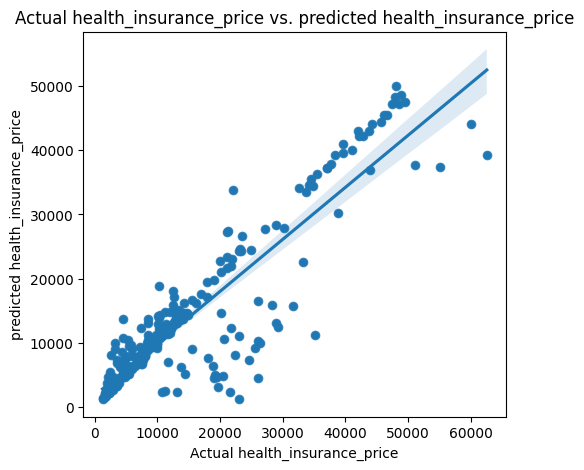

In [ ]:
# Plotting actual and predicted values using scatterplot below

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred, ax=ax1)
sns.regplot(x = y_test, y=y_pred, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

In [ ]:
# checking the metrics for RFR
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 3103.490398701356
MSE: 34071305.089867845
RMSE: 5837.063053442874
Adjusted R^2: 0.9752552160983549


In [ ]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Support Vector Machines Regressor

In [ ]:
# Importing SVR library and creating model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred1 = regressor.predict(X_test) # prediciting y

In [ ]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("Adjusted R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 9308.518703397433
MSE: 204836223.34982035
RMSE: 14312.100591800645
Adjusted R^2: -0.11165491395998317


Text(0, 0.5, 'predicted health_insurance_price')

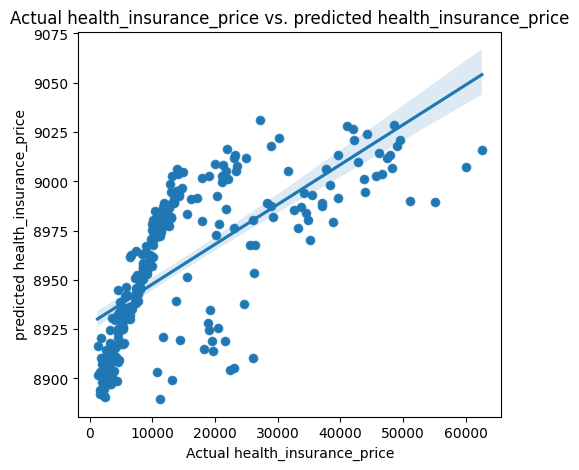

In [ ]:
# Plotting actual and predicted values using scatterplot below

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred1, ax=ax1)
sns.regplot(x = y_test, y=y_pred1, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

# XGBoost Regressor

In [ ]:
%%capture
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
#Instantiating XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:56:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
# we have to #Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#Adjusted R^2
print("Adjusted R^2:",(1 - (1-xg_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

RMSE: 10921.438715
Adjusted R^2: 0.3654131230265154


Text(0, 0.5, 'predicted health_insurance_price')

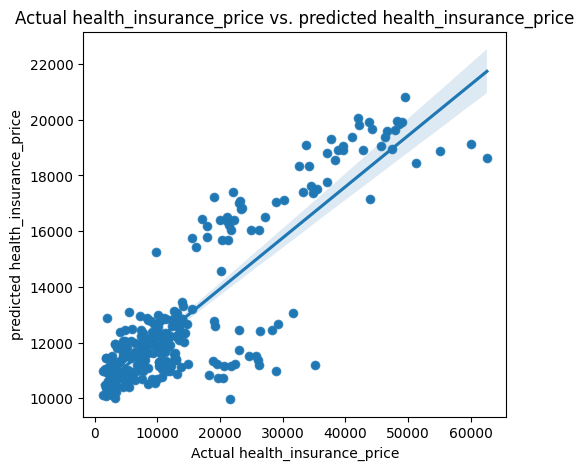

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = preds, ax=ax1)
sns.regplot(x = y_test, y=preds, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

# Decision Tree Regressor

In [ ]:
# Importing DecisionTreeRegressor from sklearn library
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Creating an object for our model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Computing the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))
#Adjusted R^2
print("Adjusted R^2:",(1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))  # R^2 is close to 1, indicating overfitting

RMSE: 6658.576892
Adjusted R^2: 0.9981803721063705


Text(0, 0.5, 'predicted health_insurance_price')

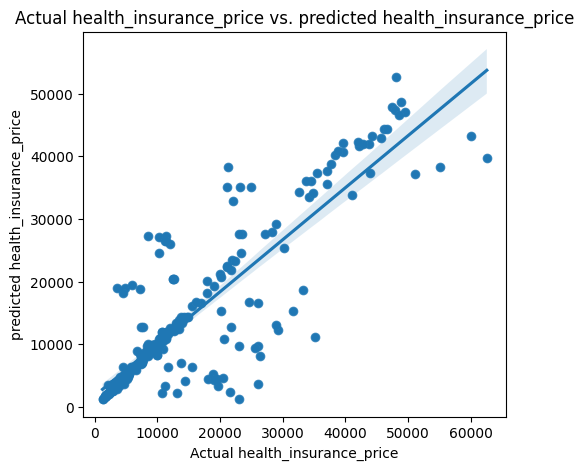

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = predictions, ax=ax1)
sns.regplot(x = y_test, y=predictions, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

Apparently the Decision Tree Regressor model is overfitting.
Therefore we will have to go through two steps to see if the model responds better - Cross Validation and then Hyperparameter Tuning

# Cross Validation

In [ ]:
# Performing crossvalidation to pick the best regression model

#For Random Forest Regressor
from sklearn.model_selection import cross_val_score
score_train=cross_val_score(rf,X_train,y_train, scoring="neg_mean_squared_error",cv=10)  # here we are using k-fold crossvalidation technique
score_train

array([-13477967.65785126, -25852108.52382604, -23365771.14334569,
       -21706684.67134601, -13403414.60882073, -28966308.55058971,
       -20865149.09759669, -26724702.15997249, -24773655.39059242,
       -25884086.90619037])

In [ ]:
from numpy import absolute
print(absolute(np.mean(score_train)))

22501984.871013142


In [ ]:
score_test=cross_val_score(rf,X_test,y_test, scoring="neg_mean_squared_error",cv=10)

In [ ]:
print(absolute(np.mean(score_test)))

36692726.24682703


In [ ]:
# For Decision Tree Regressor
score_t=cross_val_score(model,X_train,y_train, scoring="neg_mean_squared_error",cv=10)
print(absolute(np.mean(score_t)))

39084019.03667639


In [ ]:
score_tt=cross_val_score(model,X_test,y_test, scoring="neg_mean_squared_error",cv=10)
print(absolute(np.mean(score_tt)))

69054550.7744896


If you observe crossvalidation scores of both training and test data of each model, Random Forest displayed lesser values for mean squared error comparitively.

# Hyperparameter Tuning (DT Regressor)

In [ ]:
# Hyper parameters range intialization for tuning

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
# We will use RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RS = RandomizedSearchCV(estimator=model,param_distributions=parameters,cv=5,n_iter=300,n_jobs=-1, verbose=True, scoring='neg_mean_squared_error')
RS.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
675 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error', verbose=True)

In [ ]:
#let’s check the best parameters and the best score
print('Best Parameters:',RS.best_params_,end='\n\n')
print('Best Score:',RS.best_score_)

Best Parameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 5, 'max_leaf_nodes': 90, 'max_features': None, 'max_depth': 11}

Best Score: -30920668.92502883


In [ ]:
tuned_model= DecisionTreeRegressor(max_depth=9,max_features=None,max_leaf_nodes=20,
                                         min_samples_leaf=4,min_weight_fraction_leaf=0.1,splitter='best')

In [ ]:
# fitting model

tuned_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_leaf_nodes=20, min_samples_leaf=4,
                      min_weight_fraction_leaf=0.1)

In [ ]:
# prediction

tuned_pred=tuned_model.predict(X_test)

Text(0, 0.5, 'predicted health_insurance_price')

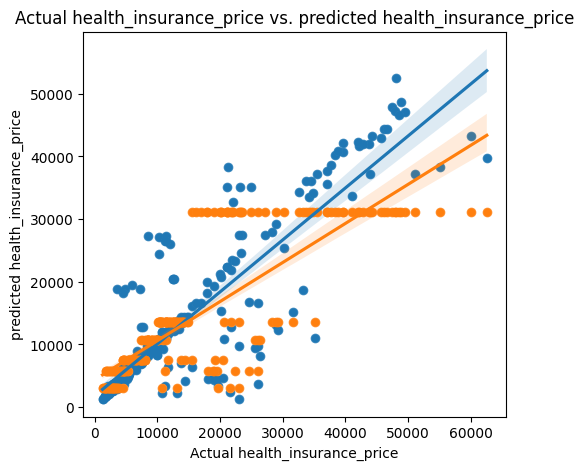

In [ ]:
#before and after tuning

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])


sns.scatterplot(x = y_test, y = predictions, ax=ax1)
sns.regplot(x = y_test, y=predictions, ax=ax1)

sns.scatterplot(x = y_test, y = tuned_pred, ax=ax1)
sns.regplot(x = y_test, y=tuned_pred, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

There is a significant improvement post tuning and looks the model is performing well comparitively

In [ ]:
#model's score on training data
tuned_model.score(X_train,y_train)

0.7036043283253195

In [ ]:
#model's score on test data
tuned_model.score(X_test,y_test)

0.6555838035729606

There is a difference between the R^2 values with and without hyperparameter tuning. Earlier, it was overfitting on the training data but it did not overfit post hyperparameter tuning.

Error rate of our model with hyperparameter tuning to our original model which is without the tuning of parameters.

In [ ]:
# With hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))
print("Adjusted R^2:",(1 - (1-tuned_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 4861.226037537827
MSE: 58701106.67441559
RMSE: 7661.664745629085
Adjusted R^2: 0.7013546458078646


In [ ]:
# without hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Adjusted R^2:",(1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 3417.7220119548874
MSE: 44336646.222413056
RMSE: 6658.5768916798625
Adjusted R^2: 0.9981803721063705


If we observe the results, performing hyperparameter tuning did not help us. It means hyperparameter tuning may not fruitful everytime.

# Hyperparameter Tuning (RF Regressor)

In [ ]:
# Hyper parameters range intialization for tuning
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
parameters={'n_estimators': n_estimators,
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           'min_samples_split': min_samples_split,
           "max_features":["auto","sqrt",None]
           }

In [ ]:
RRF = RandomizedSearchCV(rf, param_distributions=parameters, cv=5, n_iter=10,n_jobs=-1)
#cross validation is 5 with n_jobs = -1 ( that is parallel processing

# fit the object
RRF.fit(X_train, y_train)

# Display the best estimator
print(RRF.best_estimator_)

# Display the best score
print(RRF.best_score_)

# Display the best selected parameter by the randomizedSearchCV
print(RRF.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=4,
                      min_samples_split=15, n_estimators=200)
0.8554743199078325
{'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 5}


In [ ]:
# training the RandomForestRegressor with best parameters determined using randomizedSearchCV
tuned_rf= RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=10,
                      min_samples_split=10, n_estimators=400)

In [ ]:
tuned_rf.fit(X_train,y_train)  # fitting the model here

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=10,
                      min_samples_split=10, n_estimators=400)

In [ ]:
# prediction

tuned_rf_pred=tuned_rf.predict(X_test)

In [ ]:
#random forest in it's naive form
rf.score(X_train,y_train)

0.975441617483678

In [ ]:
rf.score(X_test,y_test) # R^2 value pre tuning

0.8000938999081598

In [ ]:
#R^2 value of training data post tuning

tuned_rf.score(X_train,y_train)

0.8784801192244309

In [ ]:
tuned_rf.score(X_test,y_test)  # R^2 of testing data

0.8250420311871886

Text(0, 0.5, 'predicted health_insurance_price')

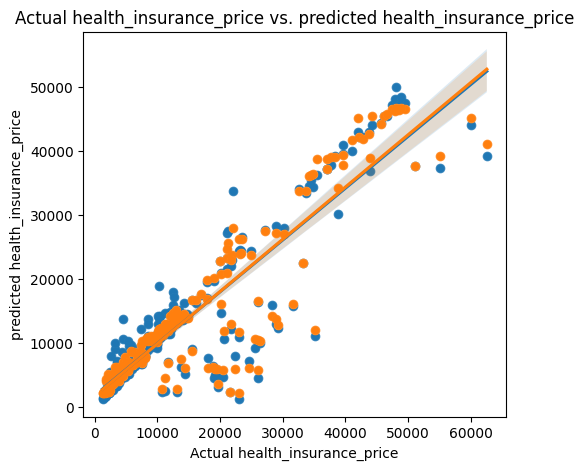

In [ ]:
#Before and After hyper parameter tuning of RandomForestRegressor(RFR)
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred, ax=ax1)
sns.regplot(x = y_test, y=y_pred, ax=ax1)

sns.scatterplot(x = y_test, y = tuned_rf_pred, ax=ax1)
sns.regplot(x = y_test, y=tuned_rf_pred, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

By looking at the above graph you can estimate that errors will be lesser post performing hyperparameter tuning.

In [ ]:
# With hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,tuned_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_rf_pred)))
print("Adjusted R^2:",(1 - (1-tuned_rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 2981.529753382804
MSE: 29819231.782253157
RMSE: 5460.69883643597
Adjusted R^2: 0.8775577671881837


In [ ]:
# Without hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 3103.490398701356
MSE: 34071305.089867845
RMSE: 5837.063053442874
Adjusted R^2: 0.9752552160983549


In [ ]:
print(" Without vs with parameter tuning metrics")
print('MAE:', metrics.mean_absolute_error(y_test,y_pred),"|"*5, 'MAE:', metrics.mean_absolute_error(y_test,tuned_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred), "|"*5, 'MSE:', metrics.mean_squared_error(y_test, tuned_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)),"|"*5,'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_rf_pred)))
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),"|"*5,"Adjusted R^2:",(1 - (1-tuned_rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

 Without vs with parameter tuning metrics
MAE: 3103.490398701356 ||||| MAE: 2981.529753382804
MSE: 34071305.089867845 ||||| MSE: 29819231.782253157
RMSE: 5837.063053442874 ||||| RMSE: 5460.69883643597
Adjusted R^2: 0.9752552160983549 ||||| Adjusted R^2: 0.8775577671881837


In [ ]:
%%capture
pip install yellowbrick

In [ ]:
#checking residuals for RandomForestRegressor
from yellowbrick.regressor import ResidualsPlot

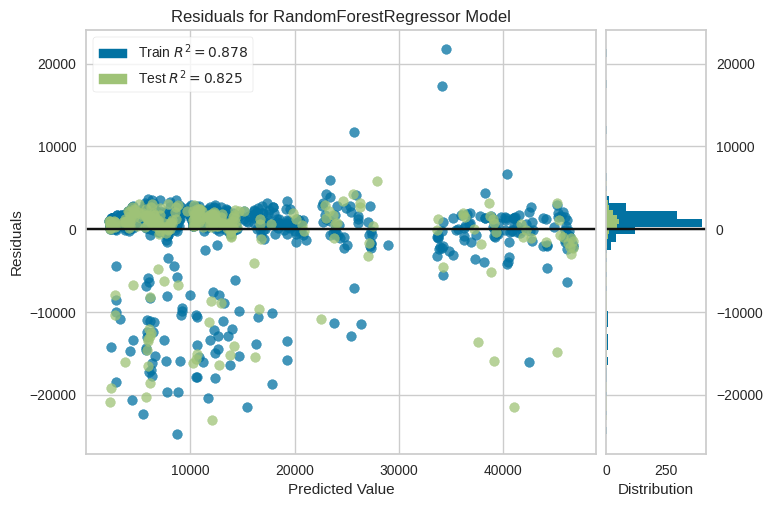

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer=ResidualsPlot(tuned_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

The coefficient of determination, or R^2,it is a statistical measure of how well the regression line approximates the actual data.

R^2= 0.88 of the variation in the y values from training data is accounted for by the x values.

R^2= 0.82 of the variation in the y values from training data is accounted for by the x values.


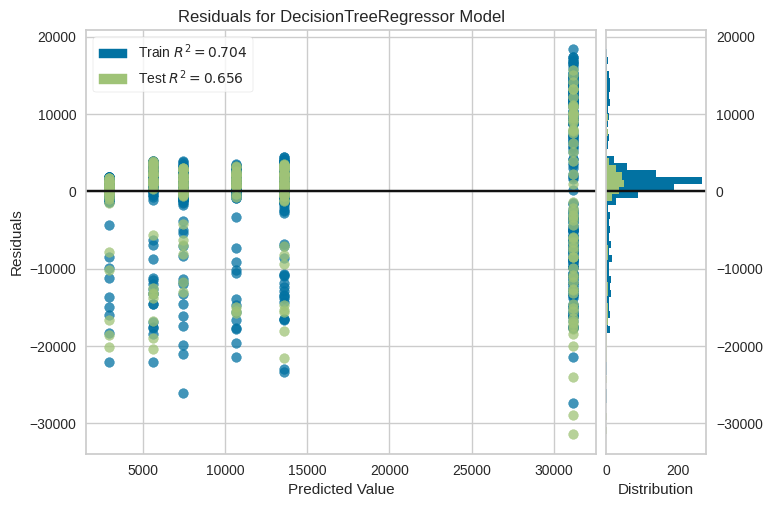

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer=ResidualsPlot(tuned_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

R^2= 0.704 of the variation in the y values from training data is accounted for by the x values.

R^2= 0.656 of the variation in the y values from training data is accounted for by the x values.


In [ ]:
#creating a barplot showcasing different metrics of decision trees and random forests

# initialize list of lists
d = [["Randomforestregressor without  HPT", 0.977255860524829,5882.6265994313035 ], ["Randomforestregressor with  HPT", 0.8785719603799325,5471.3380142056485]]

# Create the pandas DataFrame
df = pd.DataFrame(d, columns=['Modelname',"Adjusted R^2","RMSE"])

# print dataframe.
df

,Modelname,Adjusted R^2,RMSE
0,Randomforestregressor without HPT,0.977256,5882.626599
1,Randomforestregressor with HPT,0.878572,5471.338014


<ipython-input-196-df4b086b4e21>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df, x="Modelname", y="Adjusted R^2",palette=["green","red"])


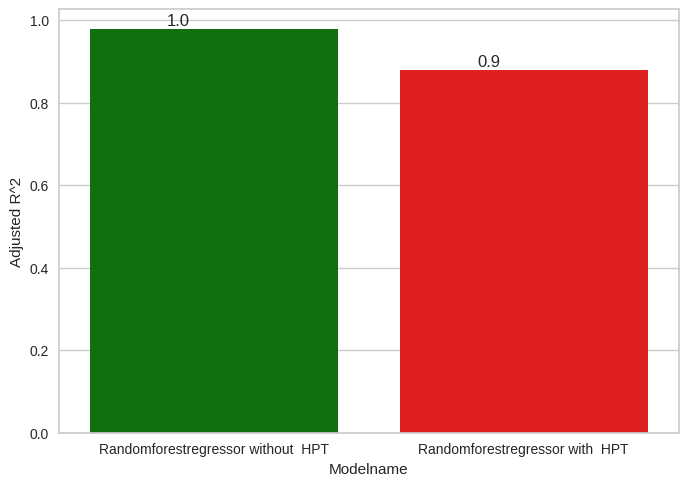

In [ ]:
# comparing Adjusted R^2 values of Random Forest before and after tuning using barplot
ax=sns.barplot(data=df, x="Modelname", y="Adjusted R^2",palette=["green","red"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

<ipython-input-197-260921462312>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df, x="Modelname", y="RMSE",palette=["#fc9272","#7fcdbb"])


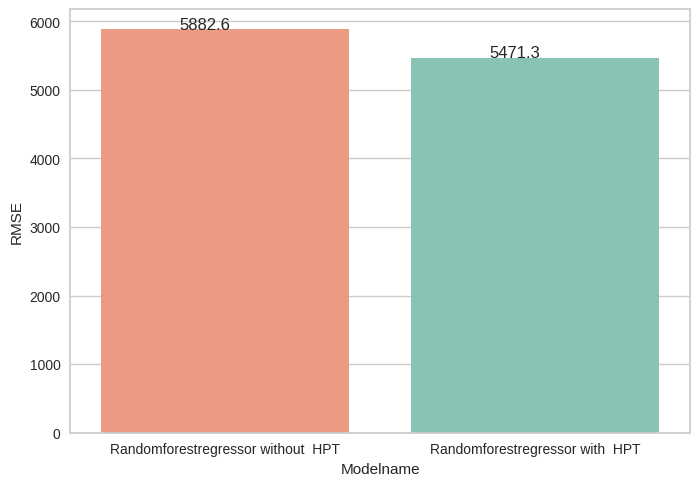

In [ ]:
# comparing rmse values of Random Forest before and after tuning using barplot
ax=sns.barplot(data=df, x="Modelname", y="RMSE",palette=["#fc9272","#7fcdbb"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

# Conclusion

Of all the 4 models (Linear Regression, Decision Tree Regression, Random Forest Regression, XGBoost Regression) tried and tested, it would be best to go ahead with the Random Forest with Hyperparameter Tuning model since it has the most optimal scores for R^2, and best crossvalidation scores

Also, smoking status has the most impact on the health insurance prices, since it influences a price rise if the customer is smoker.